Imports

In [188]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

Problem 1

x_test (100, 1)
x_train (100,)
y_test (100, 1)
y_train (100,)
Matplotlib plot of the first function


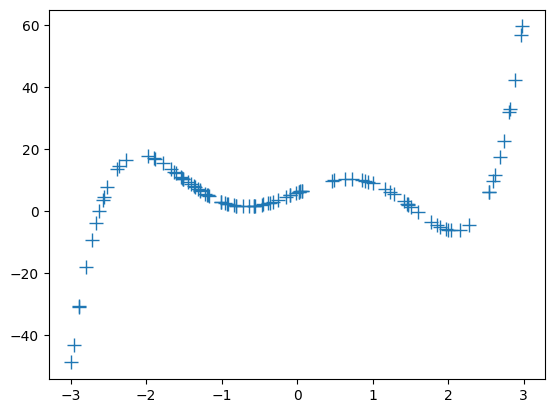

In [81]:
#Assign paths
file_path_X_test = 'x_test.npy'
file_path_X_train = 'x_train.npy'
file_path_Y_test = 'y_test.npy'
file_path_Y_train = 'y_train.npy'

#Read in data and squeeze weird extra dimension out
x_test = np.load(file_path_X_test)

x_train = np.load(file_path_X_train)

y_test = np.load(file_path_Y_test)

y_train = np.load(file_path_Y_train)

#print shapes just to make sure
print("x_test", x_test.shape)
print("x_train", y_train.shape)
print("y_test", y_test.shape)
print("y_train", y_train.shape)

#Plot the training set 
print("Matplotlib plot of the first function")
plt.figure()
plt.plot(x_train, y_train, '+', markersize = 10)

Mean Squared Error: 2.7975591054312603


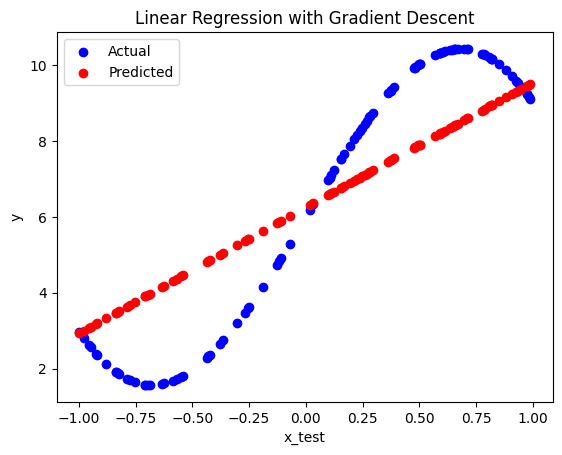

In [272]:
# Read in data
file_path_X_test = 'x_test.npy'
file_path_X_train = 'x_train.npy'
file_path_Y_test = 'y_test.npy'
file_path_Y_train = 'y_train.npy'
x_test_og = np.load(file_path_X_test)
x_train_og = np.load(file_path_X_train)
y_test_og = np.load(file_path_Y_test)
y_train_og = np.load(file_path_Y_train)

import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters
learning_rate = 0.01
num_epochs = 10000
lambda_reg = 0.0
degree = 2

# Feature engineering function 
def feature_engineering(x, degree):
    x_squared = x ** degree
    return np.hstack((x, x_squared, np.ones((x.shape[0], 1))))

# Gradient Descent function
def gradient_descent(x, y, learning_rate, num_epochs, lambda_reg):
    num_samples, num_features = x.shape
    weights = np.zeros((num_features, 1))

    for epoch in range(num_epochs):
        y_pred = np.dot(x, weights)
        error = y_pred - y
        gradient = np.dot(x.T, error) / num_samples + (2 * lambda_reg * weights)  # Regularization term added
        weights -= learning_rate * gradient

    return weights

# Make predictions
def predict(x, weights):
    return np.dot(x, weights)

# Load data
x_train = feature_engineering(x_train_og, degree)
x_test = feature_engineering(x_test_og, degree)
y_train = y_train_og.reshape(-1, 1)
y_test = y_test_og.reshape(-1, 1)

# Train the model
trained_weights = gradient_descent(x_train, y_train, learning_rate, num_epochs, lambda_reg)

# Make predictions on the test data
y_pred = predict(x_test, trained_weights)

# Calculate Mean Squared Error (MSE)
mse = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error:", mse)

# Scatter plot of x_test vs. y_pred (in red) and y_test (in blue)
plt.scatter(x_test_og, y_test, color='blue', label='Actual')
plt.scatter(x_test_og, y_pred, color='red', label='Predicted')
plt.xlabel('x_test')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()



2. Use your knowledge gleaned from the previous step to answer the following questions:

a. Is the relationship linear?
    No, it is not

b. Do you need feature engineering to add any non-linearity?
    Yes, I do

c. If so, how can you engineer these features?
    I usedWith linear regression you can only capture so much non-linearity without overfitting, so I include a regulizer in case.

d. What are some functions that you can try?
     The feature engineering done was a simple polynomial (2nd order) basis function. 

e. Plot each of them individually to verify!

Problem 2

Start with discrete inputs, simple frequency probability

First find the simple probability of each value in each feature by dividing the frequency of a specific by the total number of values (20)

In [289]:
file_path = 'Asssignment2_NB_Data.xlsx'
df = pd.read_excel(file_path)
print(df.head())
def generate_frequency_table(data_frame, column_name):
    # Group the DataFrame by the specified column and count the frequency of each unique value
    frequency_table = data_frame[column_name].value_counts().reset_index()

    # Rename the columns in the frequency table
    frequency_table.columns = [column_name, 'Frequency']

    # Calculate the total number of records in the DataFrame
    total_count = len(data_frame)

    # Add a column for the probability of each unique value
    frequency_table['P(x)'] = frequency_table['Frequency'] / total_count
    
    return frequency_table
    
ft_constructionType = generate_frequency_table(df, 'Construction type')
ft_Bedrooms = generate_frequency_table(df, '# Bedrooms')
ft_Rooms = generate_frequency_table(df, '# Rooms')
ft_Bathrooms = generate_frequency_table(df, 'Bathrooms')
ft_Garages = generate_frequency_table(df, '# Garages')

print(ft_constructionType)
#print(result_table)


#print(ft_constructionType, "\n\n", ft_Bedrooms, "\n\n", ft_Rooms, "\n\n", ft_Bathrooms, "\n\n", ft_Garages)


   House ID  Local Price  Bathrooms  Land Area  Living area  # Garages  \
0         1       4.9176        1.0      3.472        0.998        1.0   
1         2       5.0208        1.0      3.531        1.500        2.0   
2         3       4.5429        1.0      2.275        1.175        1.0   
3         4       4.5573        1.0      4.050        1.232        1.0   
4         5       5.0597        1.0      4.455        1.121        1.0   

   # Rooms  # Bedrooms  Age of home Construction type  
0        7           4           42         Apartment  
1        7           4           62             House  
2        6           3           40             Condo  
3        6           3           54         Apartment  
4        6           3           42         Apartment  
  Construction type  Frequency  P(x)
0         Apartment          7  0.35
1             House          7  0.35
2             Condo          6  0.30


In [307]:
from scipy.stats import norms
feature_names = ['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']
construction_types = df['Construction type'].unique()

# Initialize a dictionary to store conditional probabilities
conditional_probabilities = {}

# Calculate conditional probabilities for each feature within each construction type
for construction_type in construction_types:
    conditional_probabilities[construction_type] = {}
    
    for feature_name in feature_names:
        # Get the data for the current construction type
        group_data = df[df['Construction type'] == construction_type][feature_name]
        
        # Calculate the mean and standard deviation for the current feature within the group
        group_mean = group_data.mean()
        group_std = group_data.std(ddof=1)  # Use ddof=1 for sample data
        
        # Calculate conditional probability using the normal distribution
        def conditional_probability(x):
            return norm.pdf(x, loc=group_mean, scale=group_std)
        
        conditional_probabilities[construction_type][feature_name] = conditional_probability

# Print conditional probabilities
for construction_type, feature_probs in conditional_probabilities.items():
    print(f"Construction Type: {construction_type}")
    for feature_name, prob_func in feature_probs.items():
        print(f"Feature: {feature_name}")
        print(f"Conditional Probability for Mean Value: {prob_func(group_data.apply(np.mean).mean())}")
        print(f"Conditional Probability for 1 Standard Deviation Above Mean: {prob_func(group_mean + group_std)}")
        print(f"Conditional Probability for 1 Standard Deviation Below Mean: {prob_func(group_mean - group_std)}")
        print("---")


ModuleNotFoundError: No module named 'scipy'

With a total count of twenty 

In [308]:
#conditional probability of continuous-valued input 
print(df.head())
dfDiscrete = df['Construction type']


# Seperate into class groups (i.e. given Class = condo)
grouped = df.groupby('Construction type')
dfs = {group_name: group_df for group_name, group_df in grouped}
condo_df = dfs.get('Condo')
apartment_df = dfs.get('Apartment')
house_df = dfs.get('House')

#print("Condo DataFrame:")
#print(condo_df)
#print("\nApartment DataFrame:")
#rint(apartment_df)
#print("\nHouse DataFrame:")
#print(house_df)

# Continuous variables only (Local Price, Land Area, Living Area, Age of Home)
columnsDrop = ['House ID', 'Construction type']
dfCont = df.drop(columns=columnsDrop)

condo_df = df.drop(columns=columnsDrop)
apartment_df = df.drop(columns=columnsDrop)
house_df = df.drop(columns=columnsDrop)

# First find the mean of each feature
column_means = dfCont.apply(np.mean)


condo_column_means = condo_df.apply(np.mean)

apartment_column_means = apartment_df.apply(np.mean)
house_column_means = house_df.apply(np.mean)


# Next find the standard deviation of each feature
column_std = dfCont.std()

condo_column_std = condo_df.std()
apartment_column_std = apartment_df.std()
house_column_std = house_df.std()
#print(column_std)

#Find the condidtional probability of each feature
P_condo = {
    'Local Price' : [], 
    'Bathrooms' : [],  
    'Land Area' : [],  
    'Living area' : [],  
    '# Garages' : [],  
    '# Rooms' : [],  
    '# Bedrooms' : [],  
    'Age of home' : [], 
    'Construction type' : []
}



   House ID  Local Price  Bathrooms  Land Area  Living area  # Garages  \
0         1       4.9176        1.0      3.472        0.998        1.0   
1         2       5.0208        1.0      3.531        1.500        2.0   
2         3       4.5429        1.0      2.275        1.175        1.0   
3         4       4.5573        1.0      4.050        1.232        1.0   
4         5       5.0597        1.0      4.455        1.121        1.0   

   # Rooms  # Bedrooms  Age of home Construction type  
0        7           4           42         Apartment  
1        7           4           62             House  
2        6           3           40             Condo  
3        6           3           54         Apartment  
4        6           3           42         Apartment  
Local Price     3.232588
Bathrooms       0.472257
Land Area       2.594524
Living area     0.632519
# Garages       0.676679
# Rooms         1.231174
# Bedrooms      0.786398
Age of home    13.276314
dtype: float64


In [301]:

def calculate_conditional_probabilities_bayes(data, feature, target):
    # Group data by target class
    grouped_data = data.groupby(target)
    
    # Initialize a dictionary to store conditional probabilities
    conditional_probs = {}
    
    # Calculate conditional probabilities for each target class 
    for class_name, group in grouped_data:
        class_count = len(group)
        feature_counts = group[feature].value_counts()
        
        # Calculate conditional probability for each feature value
        for feature_value, count in feature_counts.items():
            conditional_prob = count / class_count
            conditional_probs[(feature_value, class_name)] = conditional_prob
    
    return conditional_probs

def calculate_conditional_probabilities_continuous(X, C):
    mu = np.mean(X)
    print(mu)

print("Bathrooms and Living area",calculate_conditional_probabilities_bayes(df, 'Bathrooms', 'House ID'))


NameError: name 'feature_values' is not defined

Problem 3

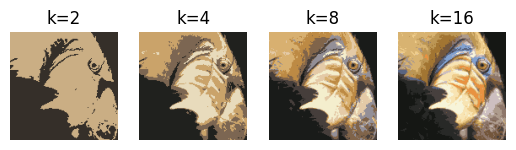

In [190]:
#read in data
img = cv2.imread('test_image.png')
height, width, channels = img.shape
pixels = img.reshape(-1, channels)


def initialize_centroids(k, pixels):
    indices = np.random.choice(len(pixels), k, replace=False)
    return pixels[indices]

def assign_to_clusters(pixels, centroids):
    distances = np.linalg.norm(pixels[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(pixels, labels, k):
    new_centroids = np.zeros((k, pixels.shape[1]))
    for cluster in range(k):
        cluster_pixels = pixels[labels == cluster]
        if len(cluster_pixels) > 0:
            new_centroids[cluster] = np.mean(cluster_pixels, axis=0)
    return new_centroids

def k_means(image, k, max_iterations=100):
    pixels = image.reshape(-1, image.shape[-1])
    centroids = initialize_centroids(k, pixels)
    
    for i in range(max_iterations):
        old_centroids = centroids.copy()
        
        # Assign pixels to clusters
        labels = assign_to_clusters(pixels, centroids)
        
        # Update centroids
        centroids = update_centroids(pixels, labels, k)
        
        # Check for convergence
        if np.all(old_centroids == centroids):
            break
    
    return centroids, labels

# Perform k-means clustering
k_values = [2, 4, 8, 16]
compressed_images = []

for k in k_values:
    centroids, labels = k_means(img, k)
    compressed_pixels = centroids[labels]
    compressed_image = compressed_pixels.reshape(height, width, channels).astype(np.uint8)
    compressed_images.append(compressed_image)

# Visualize and save the compressed images
for i, k in enumerate(k_values):
    plt.subplot(1, len(k_values), i + 1)
    plt.title(f'k={k}')
    plt.imshow(cv2.cvtColor(compressed_images[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()
